In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
# from config import api_key

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

GENERATING CITIES

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


In [6]:
# cities=cities[:5]
# cities

In [7]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"?q={city}&units=Metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url+city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown


Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | grand falls-windsor
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | nowy dwor gdanski
Processing Record 9 of Set 1 | whitehorse
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | sahatavy
City not found. Skipping...
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | purpe
Processing Record 14 of Set 1 | kirovskiy
Processing Record 15 of Set 1 | rampur
Processing Record 16 of Set 1 | san antonio de pale
Processing Record 17 of Set 1 | utrik
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | nikolayevsk-on-amure
Processing Record 21 of Set 1 | badger
Processing Record 22 of Set 1 | kuala belait
Processing Record 23 of Set 1 | petropavlovsk-kamchatsky
Proces

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,21.32,73,20,6.09,PN,1689632747
1,san patricio,28.0170,-97.5169,37.05,39,2,6.89,US,1689632747
2,puerto natales,-51.7236,-72.4875,-0.35,90,74,2.13,CL,1689632748
3,waitangi,-43.9535,-176.5597,12.68,85,84,3.58,NZ,1689632748
4,grand falls-windsor,48.9332,-55.6649,25.84,68,42,6.19,CA,1689632753
...,...,...,...,...,...,...,...,...,...
569,mili,6.0815,171.7350,27.96,78,38,5.99,MH,1689632926
570,gunjur,13.2019,-16.7339,25.04,94,75,0.00,GM,1689632927
571,muravlenko,63.7898,74.5230,15.27,66,89,5.72,RU,1689632927
572,prince george,53.9166,-122.7530,21.25,50,20,3.60,CA,1689632818


In [9]:
# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,21.32,73,20,6.09,PN,1689632747
1,san patricio,28.0170,-97.5169,37.05,39,2,6.89,US,1689632747
2,puerto natales,-51.7236,-72.4875,-0.35,90,74,2.13,CL,1689632748
3,waitangi,-43.9535,-176.5597,12.68,85,84,3.58,NZ,1689632748
4,grand falls-windsor,48.9332,-55.6649,25.84,68,42,6.19,CA,1689632753


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.32,73,20,6.09,PN,1689632747
1,san patricio,28.0170,-97.5169,37.05,39,2,6.89,US,1689632747
2,puerto natales,-51.7236,-72.4875,-0.35,90,74,2.13,CL,1689632748
3,waitangi,-43.9535,-176.5597,12.68,85,84,3.58,NZ,1689632748
4,grand falls-windsor,48.9332,-55.6649,25.84,68,42,6.19,CA,1689632753


SCATTER PLOTS

LATITUDE VS. TEMPERATURE

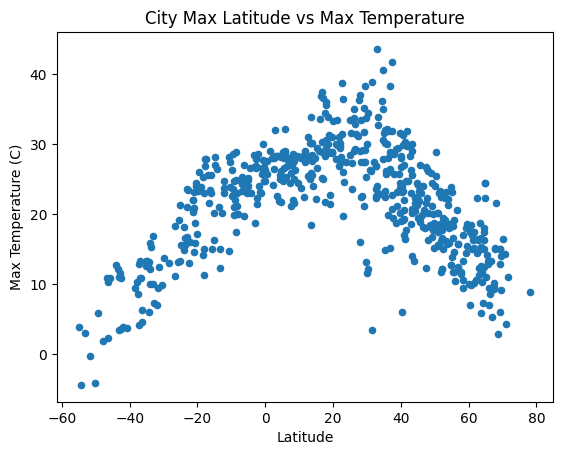

<Figure size 640x480 with 0 Axes>

In [13]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties

city_data_df.plot.scatter(x = "Lat", y = "Max Temp")
plt.title("City Max Latitude vs Max Temperature")
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Max Temperature (C)')
plt.show() 

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

LATITUDE VS HUMIDITY

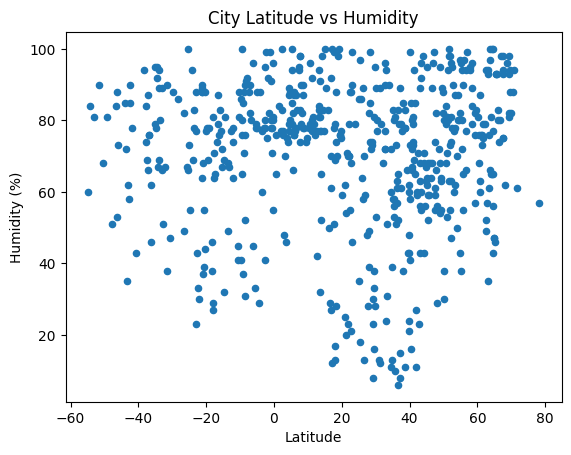

<Figure size 640x480 with 0 Axes>

In [14]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties

city_data_df.plot.scatter(x = "Lat", y = "Humidity")
plt.title("City Latitude vs Humidity")
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Humidity (%)')
plt.show() 

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

LATITUDE VS CLOUDINESS

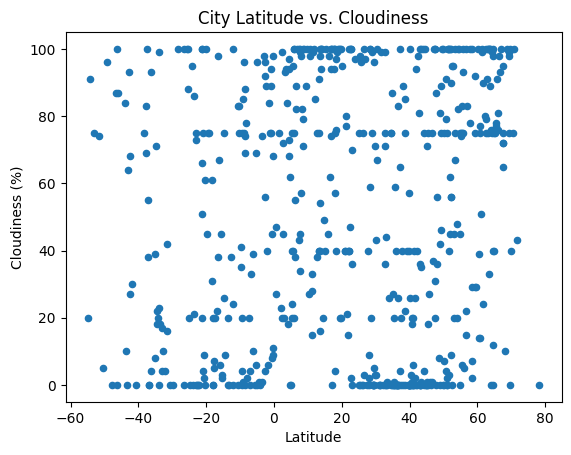

<Figure size 640x480 with 0 Axes>

In [15]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
city_data_df.plot.scatter(x = "Lat", y = "Cloudiness")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Cloudiness (%)')
plt.show() 

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

LATITUDE VS WIND SPEED PLOT

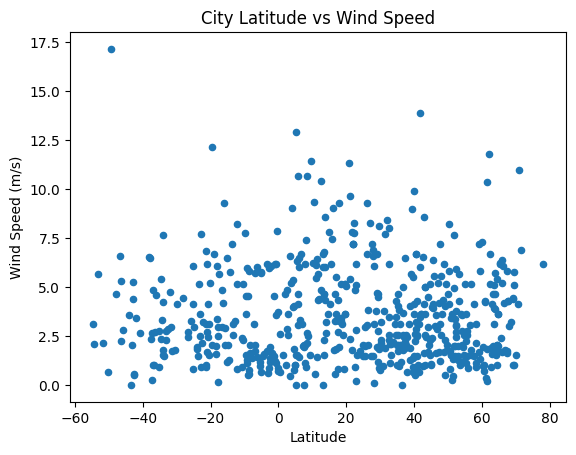

<Figure size 640x480 with 0 Axes>

In [16]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties

city_data_df.plot.scatter(x = "Lat", y = "Wind Speed")
plt.title("City Latitude vs Wind Speed")
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('Wind Speed (m/s)')
plt.show() 

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

LINEAR REGRESSION

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Display sample data
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,san patricio,28.0170,-97.5169,37.05,39,2,6.89,US,1689632747
4,grand falls-windsor,48.9332,-55.6649,25.84,68,42,6.19,CA,1689632753
5,bethel,41.3712,-73.4140,30.26,69,40,3.09,US,1689632753
6,stanley,54.8680,-1.6985,12.66,82,0,2.57,GB,1689632754
7,nowy dwor gdanski,54.2131,19.1177,15.93,87,82,2.75,PL,1689632754


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude >= 0)
# Display sample data
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.32,73,20,6.09,PN,1689632747
2,puerto natales,-51.7236,-72.4875,-0.35,90,74,2.13,CL,1689632748
3,waitangi,-43.9535,-176.5597,12.68,85,84,3.58,NZ,1689632748
9,ushuaia,-54.8000,-68.3000,3.81,60,20,3.09,AR,1689632754
14,san antonio de pale,-1.4014,5.6325,23.22,82,84,4.52,GQ,1689632755


TEMPERATURE VS LATITUDE REGRESSION

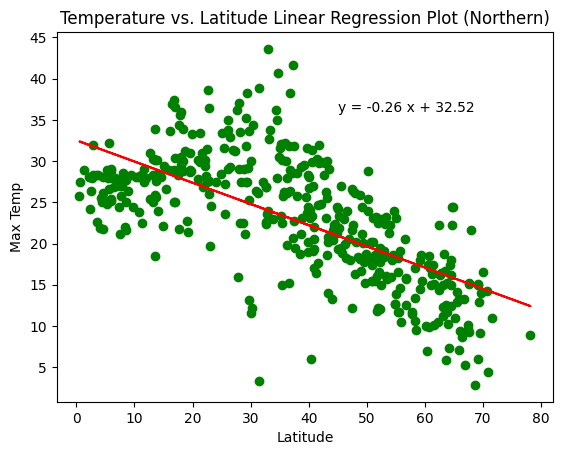

In [19]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
regress_values=northern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

# Create scatter plot
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],color='g')
plt.plot(northern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(45,36), fontsize=10)
plt.xlabel("Latitude")
plt.ylabel("Max Temp") 
plt.title("Temperature vs. Latitude Linear Regression Plot (Northern)")
plt.show()

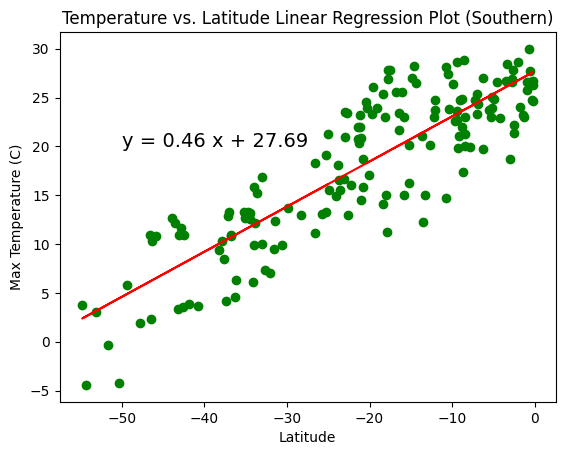

In [20]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
regress_values=southern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],color='g')
plt.plot(southern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-50,20), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)") 
plt.title("Temperature vs. Latitude Linear Regression Plot (Southern)")
plt.show()

Discussion: It is evident that there is a linear relationship as in the Northern hemisphere the temperature decreases as the latitude increases. This is shown by the negative slope and for the Southern hemisphere it is the opposite case as when going towards Latitude 0, the temperature increases as shown by the positive slope.

HUMIDITY VS LATITUDE REGRESSION

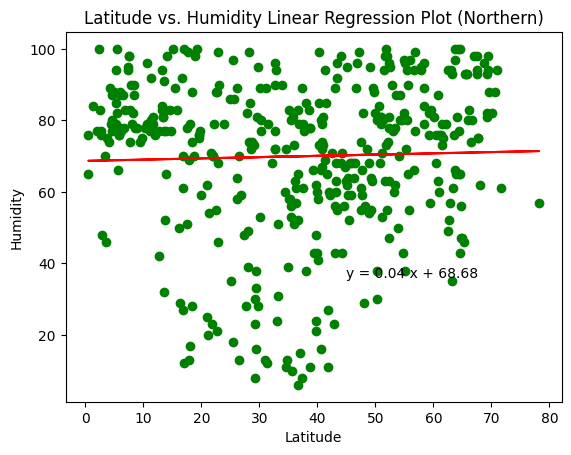

In [21]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
regress_values=northern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

# Create scatter plot
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],color='g')
plt.plot(northern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(45,36), fontsize=10)
plt.xlabel("Latitude")
plt.ylabel("Humidity") 
plt.title("Latitude vs. Humidity Linear Regression Plot (Northern)")
plt.show()

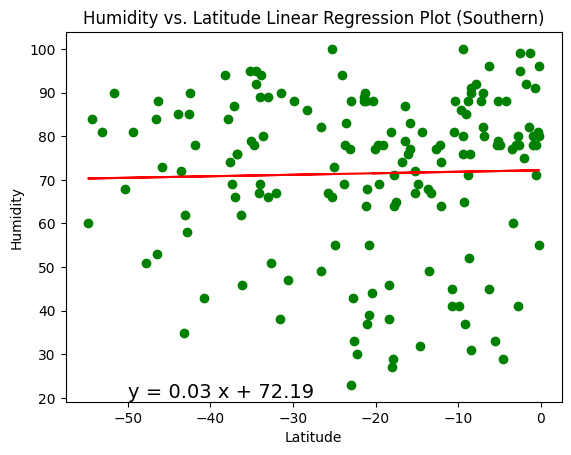

In [22]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
regress_values=southern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],color='g')
plt.plot(southern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-50,20), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Humidity") 
plt.title("Humidity vs. Latitude Linear Regression Plot (Southern)")
plt.show()

Discussion: Higher latitudes i.e. away from the equator in the northern direction is equated with a lower humidity and lower latitudes i.e. in the southern direction are generally equated with a higher humidity. 

CLOUDINESS VS LATITUDE REGRESSION

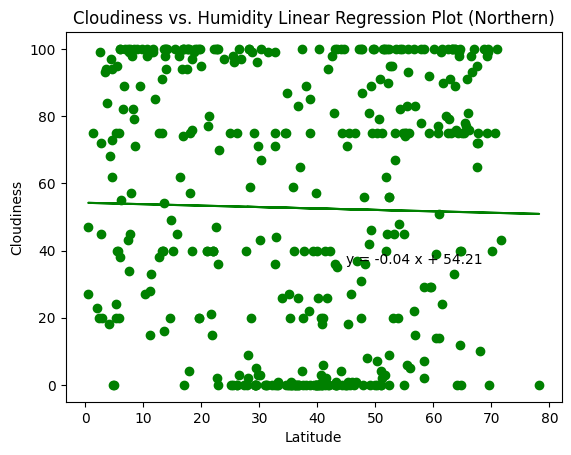

In [23]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
regress_values=northern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

# Create scatter plot
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],color='g')
plt.plot(northern_hemi_df["Lat"], regress_values, color='green')
plt.annotate(line_eq,(45,36), fontsize=10)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness") 
plt.title("Cloudiness vs. Humidity Linear Regression Plot (Northern)")
plt.show()

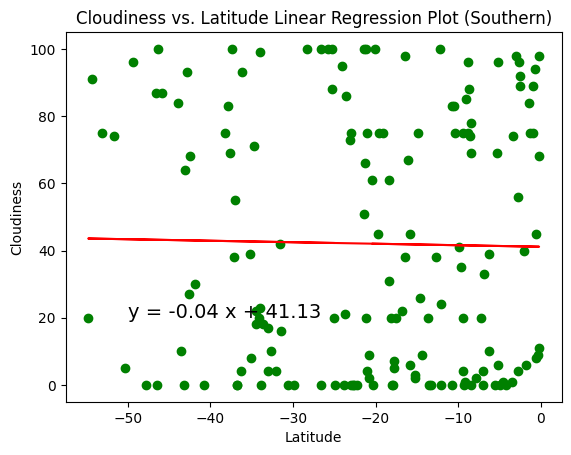

In [24]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
regress_values=southern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],color='g')
plt.plot(southern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-50,20), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness") 
plt.title("Cloudiness vs. Latitude Linear Regression Plot (Southern)")
plt.show()

Discussion: From the plots, we can see that cloudiness increases at lower latitudes and at higher latitudes, the cloudiness decreases. 

WIND SPEED VS LATITUDE REGRESSION

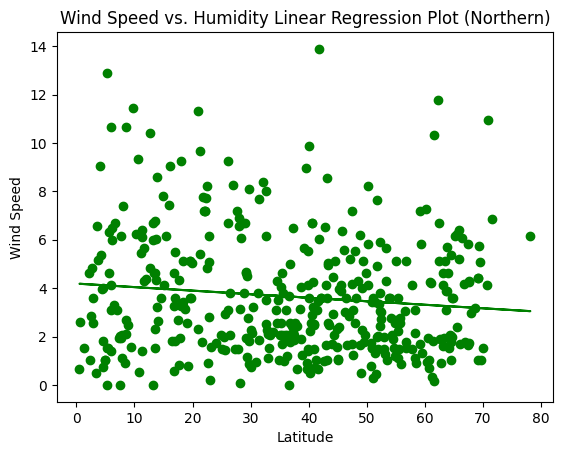

In [25]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
regress_values=northern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

# Create scatter plot
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],color='g')
plt.plot(northern_hemi_df["Lat"], regress_values, color='green')
plt.annotate(line_eq,(45,36), fontsize=10)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed") 
plt.title("Wind Speed vs. Humidity Linear Regression Plot (Northern)")
plt.show()

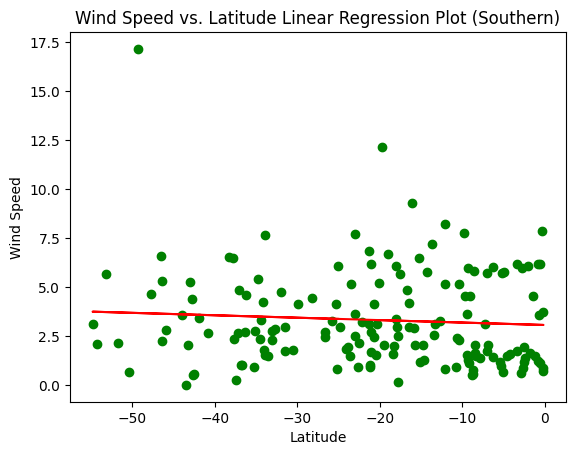

In [26]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
regress_values=southern_hemi_df["Lat"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],color='g')
plt.plot(southern_hemi_df["Lat"], regress_values, color='red')
plt.annotate(line_eq,(-50,20), fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed") 
plt.title("Wind Speed vs. Latitude Linear Regression Plot (Southern)")
plt.show()

Discussion: At higher latitudes i.e. in the Northern Hemisphere, the wind speed is relatively steady but decreases as we go to higher latitudes. In the southern hemisphere, it is a similar case and slowly decreases as the latitude increases. 